<a href="https://colab.research.google.com/github/cyrinemimouni/ML/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic_data=pd.read_excel('/content/titanic.xls')
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Afficher un histogramme qui représente le nbr de voyageur para rapport l'àge

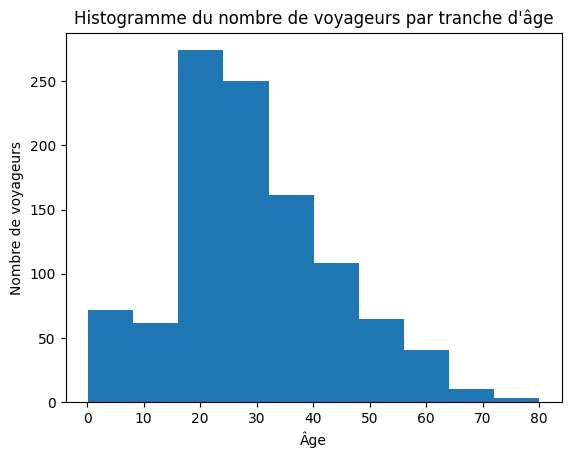

In [ ]:
plt.hist(titanic_data['age'])
plt.xlabel('Âge')
plt.ylabel('Nombre de voyageurs')
plt.title('Histogramme du nombre de voyageurs par tranche d\'âge')
plt.show()

Afficher par sexe la moyenne d'àge, le nbr par classe et la moyenne des vivants

In [ ]:
moy_age = titanic_data.groupby(['sex', 'pclass']).agg({'age': 'mean', 'survived': 'mean', 'name': 'count'})
print(moy_age)

                     age  survived  name
sex    pclass                           
female 1       37.037594  0.965278   144
       2       27.499191  0.886792   106
       3       22.185307  0.490741   216
male   1       41.029250  0.340782   179
       2       30.815401  0.146199   171
       3       25.962273  0.152130   493


Afficher le nbr de voyageurs par sexe

In [ ]:

d18=titanic_data.loc[titanic_data['age']<18,:]


In [ ]:

d18.groupby(['sex','pclass']).agg({'name': 'count'})

name
sex    pclass      
female 1          8
       2         18
       3         46
male   1          7
       2         15
       3         60

créer 4 catégories 

In [ ]:
bins = [0, 20, 30, 40, titanic_data['age'].max()]
labels = ['<20', '20-30', '30-40', '>40']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)
titanic_data
titanic_data.drop(['AgeGroup'], axis=1)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",20-30
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",<20
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",<20
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",20-30
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,<20
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,20-30
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,20-30


 Affichage du nombre de voyageurs par catégorie d'âge et par sexe

In [ ]:
nbr_voyageur=titanic_data.groupby(['sex', 'age_group']).agg({'name': 'count'})
nbr_voyageur

name
sex    age_group      
female <20         109
       20-30       126
       30-40        75
       >40          78
male   <20         139
       20-30       235
       30-40       135
       >40         149